Exercise 3.2.1 Intensity transformations

In [632]:
import skimage.io as io
from skimage import util
import numpy as np
import math

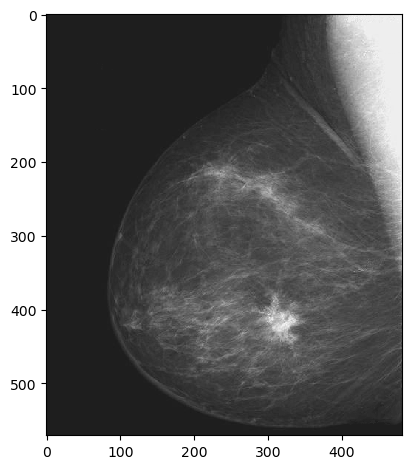

In [633]:
img = io.imread("img\Gonzalez2009-Fig3.4.tif")
io.imshow(img)

inverting the intensity of the values by linar transformation (image negative)

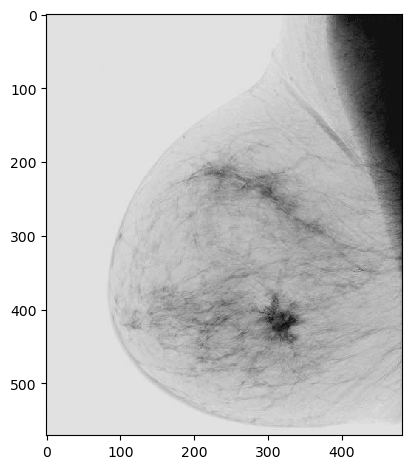

In [634]:
#img_modif = util.invert(img)
#L = 256 /// img_modif = L - 1 - inputImage(img)
img_modif = 255-img
io.imshow(img_modif)

saving the image as png

In [635]:
io.imsave("img\gonzales-3.4.png", arr=img_modif)

**************second task**************

In [636]:
img2 = io.imread("img\Gonzalez2009-Fig3.5.tif")


The log transformation is given by: s = c*log(r+1) //// s is the output image, r is the input image, and c is the scaling constant. We need to calculate c first:
c = 255/log(1+ max pixel value of r)

In [637]:
#calcualting c
max = img2.max()
print("maximum pixel value of the image is: %d" %max)
def calcul():
    c = 255/(math.log1p(max))
    return c
print("c: %.2f" %calcul())

maximum pixel value of the image is: 255
c: 45.99


In [638]:
#using log transformation easy function
def log_transform(img):
    img = calcul() * np.log1p(img)
    img = img/img.max()
    return img
#img2_modif = calcul() * np.log1p(img2)

In [639]:
#img2_modif = img2
def logTransform(c, f):
    g = c * math.log(float(1 + f),10)
    return g

def logTransformImage(image):
    c = calcul()
    for i in range(0, image.shape[0]-1):
        for j in range(0, image.shape[1]-1):
            image[i,j] = round(logTransform(c, image[i,j]))
    return image
#io.imshow(logTransformImage(img2_modif))

showing both image without then with log transformation

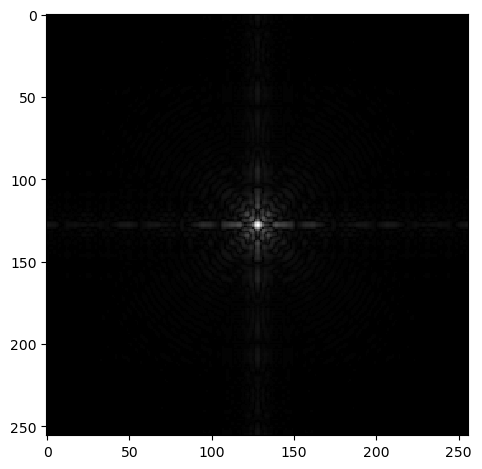

In [640]:
io.imshow(img2)

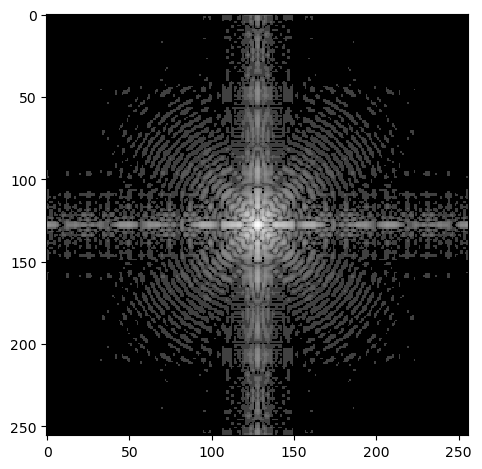

In [641]:
#img2_modif = img2_modif/img2_modif.max()
img2_modif = log_transform(img2)
io.imshow(img2_modif)

• Widens range of low intensities (narrows range of high intensities) <br />
• Compresses large dynamic ranges

3rd question

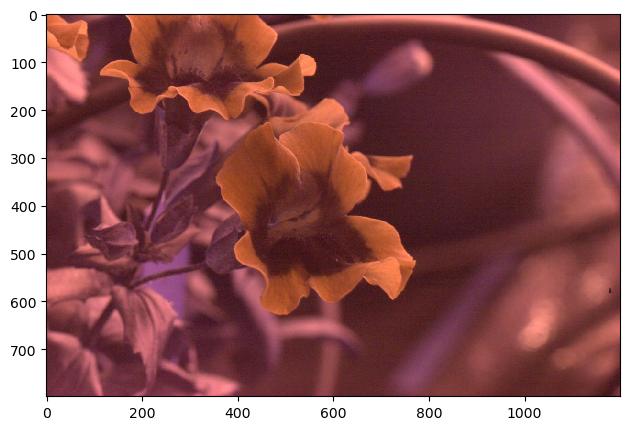

In [642]:
img3 = io.imread("img\Mimulus-CRW5320.jpg")
io.imshow(img3)

we need to apply gamma correction on img3. It is given by: s = c * r^y, where s is output image, r is the input image and c is calculated above for log transformation. </br>
y is gamma.

In [643]:
def pixel_transofrm(img,c,gamma):
    power = round(1/gamma, 2)
    p = c * pow(img,power)
    return p
def calcul_gamma(image,c,power):
    for i in range (0,image.shape[0]-1):
        for j in range (0,image.shape[1]-1):
            for k in range (0,image.shape[2]-1):
                image[i,j,k] = pixel_transofrm(image[i,j,k],c,power)
    return image



#easy function instead of the above two
def gamma(img,gamma):
    img = calcul() * pow(img,gamma)
    img = img/img.max()
    return img

gamma above 1

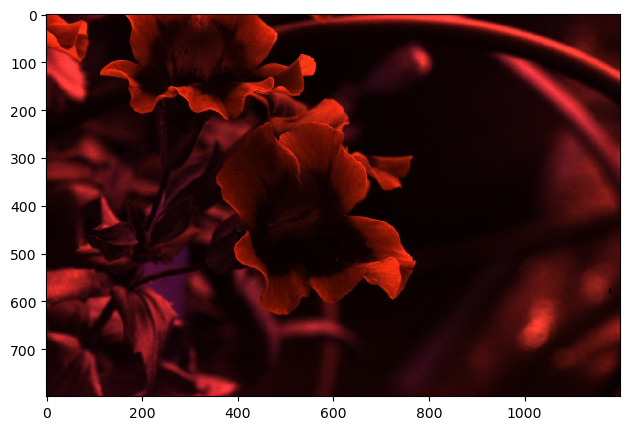

In [644]:
#image = calcul_gamma(img3,1,2.5)
#io.imshow(image)
img3_modif = gamma(img3,2.5)
io.imshow(img3_modif)

gamma below 1

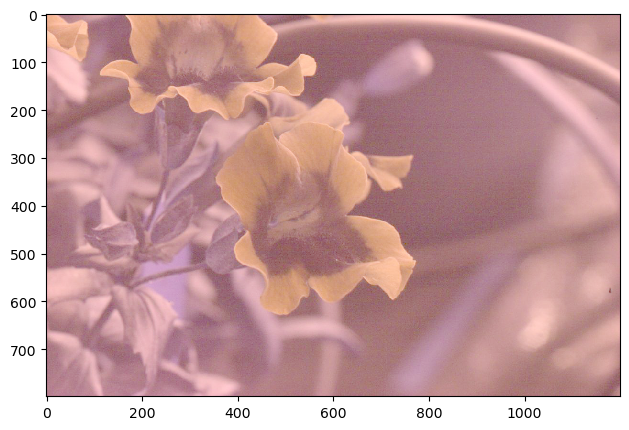

In [645]:
#image2 = calcul_gamma(img3,1,0.4)
#io.imshow(image2)
img3_modif2 = gamma(img3,0.4)
io.imshow(img3_modif2)

original image with gamma = 1

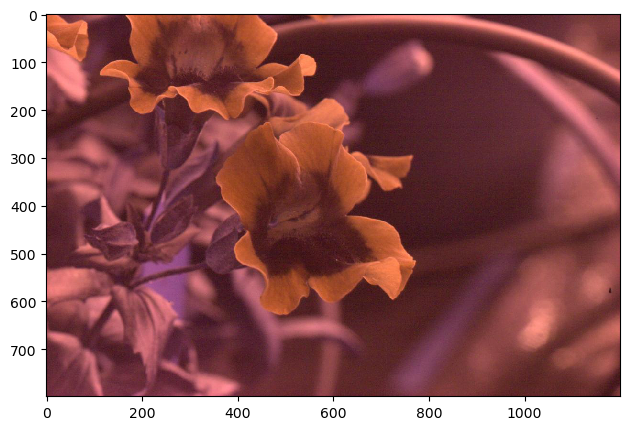

In [646]:
image3 = gamma(img3,1)
io.imshow(image3)